# Import necessary modules

In [ ]:
!pip install yfinance matplotlib
!pip install pandas numpy yfinance
!pip install statsmodels

# Display bell curve for reference

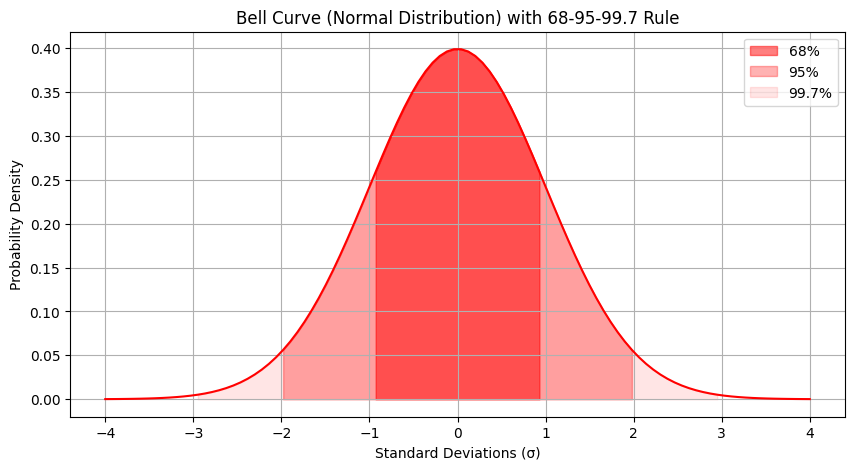

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create data for the bell curve
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plotting the bell curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red')

# Highlighting the 68-95-99.7 rule areas
plt.fill_between(x, y, where=((x > mu - sigma) & (x < mu + sigma)), color='red', alpha=0.5, label='68%')
plt.fill_between(x, y, where=((x > mu - 2*sigma) & (x < mu + 2*sigma)), color='red', alpha=0.3, label='95%')
plt.fill_between(x, y, where=((x > mu - 3*sigma) & (x < mu + 3*sigma)), color='red', alpha=0.1, label='99.7%')

plt.title('Bell Curve (Normal Distribution) with 68-95-99.7 Rule')
plt.xlabel('Standard Deviations (σ)')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
!pip install pytickersymbols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.43.0
    Uninstalling wheel-0.43.0:
      Successfully uninstalled wheel-0.43.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np
from math import floor
import pandas as pd





In [ ]:
# one ticker
symbol = 'VINC'

start_date = '2023-9-25'
end_date = '2024-03-25'

data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data['returns'] = data['Adj Close'].pct_change()
data['returns'] = data['returns'].dropna()
stats = data['returns'].describe()
print(stats)
# data['returns']

count    124.000000
mean       0.018611
std        0.103623
min       -0.199752
25%       -0.034677
50%        0.000513
75%        0.050851
max        0.707182
Name: returns, dtype: float64


In [ ]:
desc_stats = {
    'Kurtosis': data['returns'].kurtosis()
}

desc_stats

{'Kurtosis': 15.677144927027403}

# Get tickers from S&P 500

In [ ]:
import pandas as pd
import pytickersymbols
from pytickersymbols import PyTickerSymbols

stock_data = PyTickerSymbols()

spy_stocks = stock_data.get_stocks_by_index('S&P 500')

# print(list(spy_stocks)[0]['symbol'])

tickers = []
spy_stocks_list = list(spy_stocks)
n = len(spy_stocks_list)
print(n)
for i in range(len(spy_stocks_list)):
  tickers.append(spy_stocks_list[i]['symbol'])


print(tickers)


# https://pypi.org/project/pytickersymbols/





499
['LIN', 'CCL', 'SSE', 'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'NKE', 'MRK', 'MSFT', 'PFE', 'PG', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'WBA', 'DIS', 'ATVI', 'ADBE', 'AKAM', 'GOOGL', 'AMZN', 'AAL', 'AMGN', 'ADI', 'AMAT', 'ADSK', 'ADP', 'BIIB', 'CHTR', 'CTSH', 'CMCSA', 'COST', 'CSX', 'XRAY', 'DISH', 'DLTR', 'EBAY', 'EA', 'EXPE', 'FAST', 'FISV', 'GILD', 'HSIC', 'ILMN', 'INCY', 'INTU', 'ISRG', 'KHC', 'LRCX', 'MAR', 'MCHP', 'MU', 'MDLZ', 'MNST', 'NTAP', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'QCOM', 'REGN', 'ROST', 'STX', 'SWKS', 'SBUX', 'TMUS', 'TSLA', 'TXN', 'TSCO', 'ULTA', 'VRSK', 'VRTX', 'WDC', 'ABT', 'ABBV', 'ACN', 'ALL', 'MO', 'AIG', 'T', 'BAC', 'BK', 'BRK-B', 'BLK', 'BKNG', 'BMY', 'COF', 'C', 'CL', 'COP', 'CVS', 'DHR', 'DUK', 'LLY', 'EMR', 'EXC', 'FDX', 'F', 'GE', 'GM', 'HON', 'KMI', 'LOW', 'MA', 'MDT', 'MET', 'MS', 'NEE', 'OXY', 'ORCL', 'PM', 'RTN', 'SLB', 'SPG', 'SO', 'TGT', 'UNP', 'UPS', '

## Display tickers with Kurtosis and Skewness



In [ ]:
valid_tickers = []
for ticker in tickers:
  start_date = '2023-04-09'
  end_date = '2024-03-25'

  data = yf.download(ticker, start=start_date, end=end_date)

  data['returns'] = data['Adj Close'].pct_change()
  data['returns'] = data['returns'].dropna()
  stats = data['returns'].describe()

  desc_stats = {
    'Kurtosis': data['returns'].kurtosis(),
    'Skewness': data['returns'].skew()
  }

  # kurtosis function returns excess kurtosis (kurtosis_off_asset - 3) so kurtosis = 0 is normal
  if desc_stats['Kurtosis'] < 1.3 and desc_stats['Kurtosis'] > -1.3 and desc_stats['Skewness'] < 0.5 and desc_stats['Skewness'] > -0.5:
    valid_tickers.append((ticker, desc_stats['Kurtosis'], desc_stats['Skewness']))

valid_tickers

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SSE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2024-03-25)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[***************

[('XOM', 0.21310733609301202, -0.09302110918367182),
 ('V', 0.7386170244343062, -0.25961513960140176),
 ('AMAT', 0.783354752039604, 0.3261551344028113),
 ('ADSK', 0.907679891069586, -0.44394171435371244),
 ('CSX', 1.049596892743597, -0.2346249637978009),
 ('ILMN', 1.045540690597726, 0.1981329374121015),
 ('MAR', 1.2401346948639262, -0.18605528733795754),
 ('MCHP', 0.7271314815251784, 0.0484630024532735),
 ('NXPI', -0.05397154738567078, 0.016978643655722155),
 ('PCAR', 0.8629377690134641, 0.23440835377263874),
 ('SWKS', 1.0025185061263433, -0.15425641673971077),
 ('TXN', 0.8163862825613748, 0.10302012097326088),
 ('TSCO', 1.199966094030294, 0.14697969837915553),
 ('BRK-B', 1.2070355725882238, 0.16123280981312244),
 ('COP', 0.599115625479377, 0.12695719557558624),
 ('DUK', 0.14041114222362072, 0.01633111505477379),
 ('KMI', 0.6265478173366481, 0.18908073877319445),
 ('LOW', 1.111342567955972, 0.3326322255609393),
 ('OXY', 0.844595304571027, 0.23128430486992754),
 ('SO', 0.556610891626215

In [ ]:
tickers = [triple[0] for triple in valid_tickers]
# tickers

df = pd.DataFrame(tickers)

data = yf.download(tickers, start=start_date, end=end_date)




# data['returns'] = data['V']['Adj Close'].pct_change()
# data['returns'] = data['returns'].dropna()

# data['returns']

[*********************100%%**********************]  76 of 76 completed


# Generate Correlation Matrix

In [ ]:
returns_df = pd.DataFrame(data['Adj Close'].pct_change().dropna())
corr_df = pd.DataFrame(returns_df.corr())
import seaborn as sns
plt.figure(figsize = (100,100))
sns.heatmap(corr_df, annot = True)
plt.show()

#Perform Cointegration Test


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from statsmodels.tsa.stattools import coint
from datetime import datetime, timedelta

# Define your stock pairs
stock_pairs = [
    ('FRT', 'REG'),
    ('KLAC', 'AMAT'),
    ('MTB', 'CFG'),
    ('EOG', 'COP'),
    ('MRO', 'COP'),
    ('KMI', 'WMB'),
    ('NXPI', 'MCHP'),
    ('OXY', 'MRO'),
    ('HES', 'COP'),
    ('XOM', 'COP'),
    ('HES', 'XOM'),
    ('PSX', 'VLO'),
    ('LNT', 'CMS'),
    ('MRO', 'APA'),
    ('KEY', 'CFG'),
    ('DTE', 'CME'),
    ('LNT', 'DTE'),
    ('LNT', 'DUK'),
    ('MRO', 'EOG'),
    ('MAR', 'HLT'),
    ('LNT', 'ETR'),
    ('LNT', 'EVRG')
]

# Define the periods for the cointegration test
periods = {
    'One Year': 365,
    'Six Months': 182,
    'Three Months': 91,
    'One Month': 30
}

# Define the end date
end_date = datetime(2024, 3, 25)

# Download data only once if possible
all_data = {}
for pair in stock_pairs:
    for stock in pair:
        if stock not in all_data:
            all_data[stock] = yf.download(stock, start=(end_date - timedelta(days=365)).strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))['Adj Close']

all_period_results = []

for period_name, days in periods.items():
    start_date = end_date - timedelta(days=days)
    cointegration_results = []

    for stock1, stock2 in stock_pairs:
        data1 = all_data[stock1][start_date:end_date]
        data2 = all_data[stock2][start_date:end_date]

        if not data1.empty and not data2.empty:
            # Log the prices
            log_data1 = data1
            log_data2 = data2

            # Perform cointegration test
            score, pvalue, _ = coint(log_data1, log_data2)
            cointegration_test_result = coint(log_data1, log_data2)
            critical_values_1_percent = cointegration_test_result[2][0]
            critical_values_5_percent = cointegration_test_result[2][1]
            critical_values_10_percent = cointegration_test_result[2][2]

            # Record the results
            cointegration_results.append({
                'pair': f'{stock1}-{stock2}',
                'score': score,
                'p-value': pvalue,
                'critical 1%': critical_values_1_percent,
                'critical 5%': critical_values_5_percent,
                'critical 10%': critical_values_10_percent
            })

    period_results_df = pd.DataFrame(cointegration_results)
    print(f"\nCointegration results for {period_name}:")
    print(period_results_df)
    all_period_results.append(period_results_df)

# Combine results from all periods
combined_results = pd.concat(all_period_results)
grouped_results = combined_results.groupby('pair')['p-value'].agg(['mean', 'count'])

# Filter pairs with consistently low average p-values and reported in all periods
recommended_pairs = grouped_results[(grouped_results['mean'] < 0.05) & (grouped_results['count'] == len(periods))]

# Display recommended pairs
print("\nRecommended pairs for pairs trading based on consistent cointegration across all periods:")
print(recommended_pairs)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


Cointegration results for One Year:
         pair     score   p-value  critical 1%  critical 5%  critical 10%
0     FRT-REG -0.971056  0.908201    -3.940964    -3.360779     -3.061527
1   KLAC-AMAT -2.017339  0.519554    -3.940964    -3.360779     -3.061527
2     MTB-CFG -3.572847  0.026461    -3.940964    -3.360779     -3.061527
3     EOG-COP -2.226304  0.410843    -3.940964    -3.360779     -3.061527
4     MRO-COP -2.142288  0.454293    -3.940964    -3.360779     -3.061527
5     KMI-WMB -2.626190  0.227240    -3.940964    -3.360779     -3.061527
6   NXPI-MCHP -1.574374  0.731584    -3.940964    -3.360779     -3.061527
7     OXY-MRO -3.526652  0.030105    -3.940964    -3.360779     -3.061527
8     HES-COP -2.793484  0.167767    -3.940964    -3.360779     -3.061527
9     XOM-COP -2.091471  0.480826    -3.940964    -3.360779     -3.061527
10    HES-XOM -2.468653  0.293066    -3.940964    -3.360779     -3.061527
11    PSX-VLO -2.591492  0.240273    -3.940964    -3.360779     -3.061527
1

# Generate Aggregate Volatilities


In [ ]:
#Finding aggregate volatility of every stock pair
def get_pair_volatility(stock_symbol1, stock_symbol2, start_date, end_date):
    # Download historical price data
    stock_data1 = yf.download(stock_symbol1, start=start_date, end=end_date)
    stock_data2 = yf.download(stock_symbol2, start=start_date, end=end_date)

    # Calculate daily returns
    stock_data1['Daily Return'] = stock_data1['Close'].pct_change()
    stock_data2['Daily Return'] = stock_data2['Close'].pct_change()

    # Compute standard deviation of daily returns
    std_dev1 = stock_data1['Daily Return'].std()
    std_dev2 = stock_data2['Daily Return'].std()

    # Aggregate volatility
    aggregate_volatility = (std_dev1 + std_dev2) / 2.0

    return aggregate_volatility

for stock1, stock2 in stock_pairs:
  pair_volatility = get_pair_volatility(stock1, stock2, start_date, end_date)
  print(stock1, " ", stock2, ", Aggregate volatility of the pair:", pair_volatility)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

FRT   REG , Aggregate volatility of the pair: 0.012392458742812903



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KLAC   AMAT , Aggregate volatility of the pair: 0.01992052292464897


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MTB   CFG , Aggregate volatility of the pair: 0.01770440903004722


[*********************100%%**********************]  1 of 1 completed


EOG   COP , Aggregate volatility of the pair: 0.00932087529643795


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MRO   COP , Aggregate volatility of the pair: 0.01021815572561357


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KMI   WMB , Aggregate volatility of the pair: 0.008022390259602906


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


NXPI   MCHP , Aggregate volatility of the pair: 0.022130562115008228


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


OXY   MRO , Aggregate volatility of the pair: 0.008552788127359757


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


HES   COP , Aggregate volatility of the pair: 0.012205210881502747


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


XOM   COP , Aggregate volatility of the pair: 0.009282769405945137
HES   XOM , Aggregate volatility of the pair: 0.010535482402892043


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PSX

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


   VLO , Aggregate volatility of the pair: 0.015638132618864174
LNT   CMS , Aggregate volatility of the pair: 0.008815345542694263


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MRO   APA , Aggregate volatility of the pair: 0.011792231219029014
KEY   CFG , Aggregate volatility of the pair: 0.019348788617692486


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


DTE   CME , Aggregate volatility of the pair: 0.009942138792041266
LNT   DTE , Aggregate volatility of the pair: 0.00889974888586543
LNT   DUK , Aggregate volatility of the pair: 0.007936001982679722
MRO   EOG , Aggregate volatility of the pair: 0.008586533137495682


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


MAR   HLT , Aggregate volatility of the pair: 0.008254012882868539
LNT   ETR , Aggregate volatility of the pair: 0.007360819031728743


[*********************100%%**********************]  1 of 1 completed

LNT   EVRG , Aggregate volatility of the pair: 0.008547795159714626


Ranking of pairs by aggregate volatility:

1. NXPI - MCHP, Aggregate volatility: 0.022130562115008228
2. KLAC - AMAT, Aggregate volatility: 0.01992052292464897
3. KEY - CFG, Aggregate volatility: 0.019348788617692486
4. VLO - PSX, Aggregate volatility: 0.015638132618864174
5. FRT - REG, Aggregate volatility: 0.012392458742812903
6. HES - XOM, Aggregate volatility: 0.010535482402892043
7. MRO - APA, Aggregate volatility: 0.011792231219029014
8. MRO - COP, Aggregate volatility: 0.01021815572561357
9. EOG - COP, Aggregate volatility: 0.00932087529643795
10. XOM - COP, Aggregate volatility: 0.009282769405945137
11. HES - COP, Aggregate volatility: 0.012205210881502747
12. DTE - CME, Aggregate volatility: 0.009942138792041266
13. MRO - EOG, Aggregate volatility: 0.008586533137495682
14. LNT - CMS, Aggregate volatility: 0.008815345542694263
15. LNT - DTE, Aggregate volatility: 0.00889974888586543
16. LNT - EVRG, Aggregate volatility: 0.008547795159714626
17. HLT - MAR, Aggregate volatility: 0.008254012882868539
18. MRO - OXY, Aggregate volatility: 0.008552788127359757
19. LNT - ETR, Aggregate volatility: 0.007360819031728743
20. LNT - DUK, Aggregate volatility: 0.007936001982679722


